In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv(r"hr_employee_data.csv")
df.head()

,EmployeeID,Name,Age,Gender,Department,Position,Years_at_Company,Monthly_Salary,Education_Level,Performance_Score,Last_Appraisal_Year,Left_Company
0,1,Employee_1,50.0,Female,HR,Manager,21,6058.0,PhD,3.95,2021,No
1,2,Employee_2,36.0,Male,Marketing,Manager,18,6978.0,Masters,3.15,2022,No
2,3,Employee_3,29.0,Male,NaN,Intern,15,14169.0,PhD,4.36,2021,Yes
3,4,Employee_4,42.0,Male,IT,Assistant,20,9031.0,Bachelors,2.36,2024,No
4,5,Employee_5,NaN,NaN,Finance,Assistant,26,7120.0,PhD,NaN,2023,Yes


In [95]:
df.replace('NaN', np.nan, inplace=True)

### Fill missing values, median for numerical, and mode for categorical

In [96]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])
df['Monthly_Salary'] = df['Monthly_Salary'].fillna(df['Monthly_Salary'].median())

### Department with the highest turnover

In [97]:
turnover = df[(df['Left_Company'] == 'Yes') & df['Department'].notna()]
turnover_count = turnover['Department'].value_counts().reset_index()
turnover_count.columns = ['Department', 'Number_Left']
turnover_count

,Department,Number_Left
0,Marketing,149
1,Finance,92
2,Sales,92
3,IT,85
4,HR,80


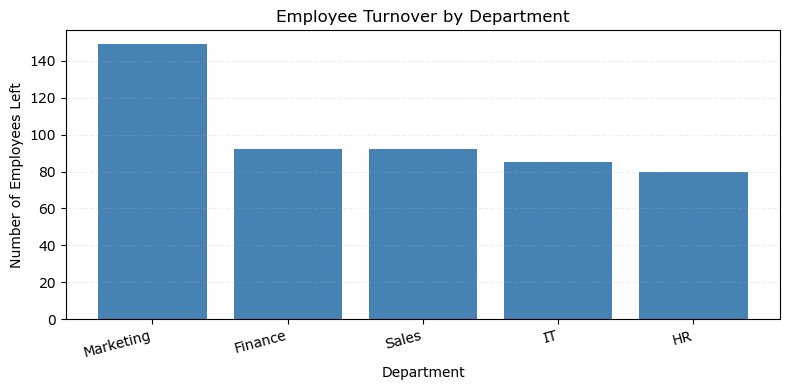

In [98]:
#turnover_count = turnover_count.sort_values('Number_Left', ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(turnover_count['Department'], turnover_count['Number_Left'], color='steelblue')
plt.title('Employee Turnover by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees Left')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

### What is the average salary by department?

In [99]:
dept_grp = df.groupby('Department')['Monthly_Salary'].mean().round(2).sort_values()
print(f"The average Salary by Department {dept_grp}")

The average Salary by Department Department
Marketing    8532.38
Finance      8739.96
HR           8789.11
Sales        8850.50
IT           8885.02
Name: Monthly_Salary, dtype: float64


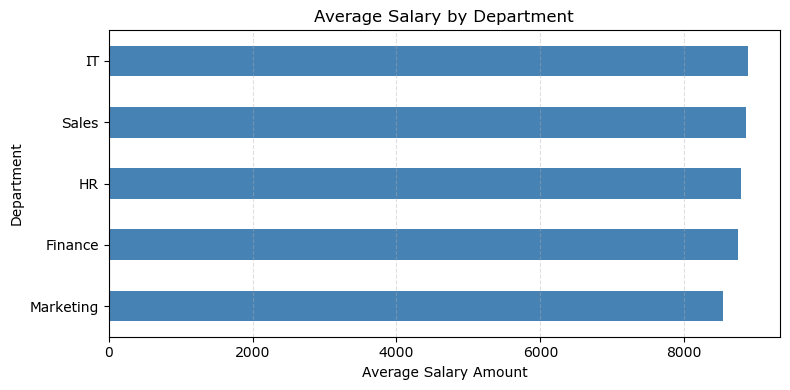

In [100]:
dept_grp.sort_values(ascending=True).plot(kind='barh', color='steelblue', figsize=(8, 4))
plt.title('Average Salary by Department')
plt.xlabel('Average Salary Amount')
plt.ylabel('Department')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### What’s the average performance score by position

In [101]:
position_grp = df.groupby('Position')['Performance_Score'].mean().round(2)
print(f"The average performance score by position {position_grp}")

The average performance score by position Position
Analyst      2.89
Assistant    2.86
Executive    2.86
Intern       3.21
Manager      2.98
Name: Performance_Score, dtype: float64


<Axes: title={'center': 'What is the average Performance by Position'}, xlabel='Average Performance Score', ylabel='Position'>

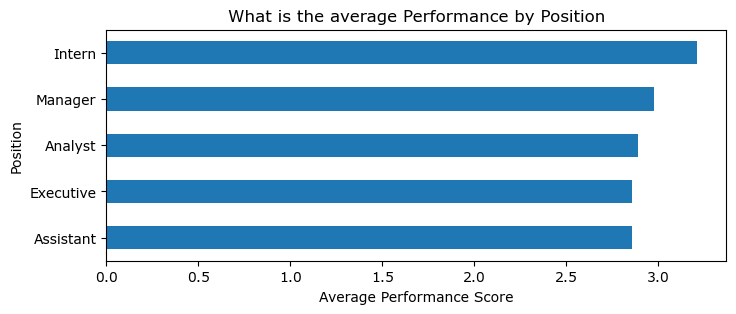

In [113]:
position_grp.sort_values(ascending=True).plot(kind='barh', xlabel= 'Average Performance Score',ylabel= 'Position',figsize=(8,3), title='What is the average Performance by Position')

#### Do older employees tend to leave more?

In [114]:
stay = ((df['Age'] >= 42) & (df['Left_Company'] == 'Yes')).value_counts()
stay

False    730
True     270
Name: count, dtype: int64

<Axes: title={'center': 'Do older employees tend to leave more?'}>

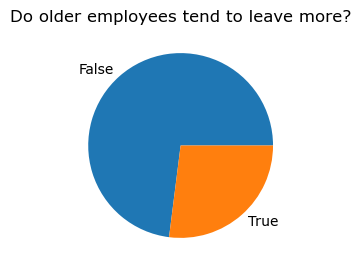

In [115]:
stay.plot(title='Do older employees tend to leave more?', figsize=(3,3), ylabel='', kind='pie')

### Compare average performance scores between employees who left and those who stayed.

In [116]:
left_comp_grp = df.groupby('Left_Company')['Performance_Score'].mean().round(2)
print(f"those who stayed have higher avg performance score {left_comp_grp}")

those who stayed have higher avg performance score Left_Company
No     2.98
Yes    2.94
Name: Performance_Score, dtype: float64


### How many employees have not been appraised in the last 2 years?

In [117]:
not_appraised = (df['Last_Appraisal_Year'] < 2023).sum()
print(f"{not_appraised} employees have not been appraised in the last 2 years")

505 employees have not been appraised in the last 2 years


### Find the top 10 longest-serving employees and their last appraisal year.

In [118]:
top_10 = df[['Name', 'Years_at_Company', 'Last_Appraisal_Year']].nlargest(10, 'Years_at_Company')
top_10

,Name,Years_at_Company,Last_Appraisal_Year
9,Employee_10,29,2021
83,Employee_84,29,2021
89,Employee_90,29,2021
241,Employee_242,29,2023
265,Employee_266,29,2023
269,Employee_270,29,2021
271,Employee_272,29,2023
295,Employee_296,29,2023
304,Employee_305,29,2023
347,Employee_348,29,2022


### predicting whether an employee might leave the company using basic logic or patterns you see (e.g. low performance + low salary).

In [119]:
df['Risk_of_Exit'] = (df['Performance_Score'] < 3) & (df['Monthly_Salary'] < 3000)
df['Risk_of_Exit'] = df['Risk_of_Exit'].map({True: 'High', False: 'Low'})
df.head()

,EmployeeID,Name,Age,Gender,Department,Position,Years_at_Company,Monthly_Salary,Education_Level,Performance_Score,Last_Appraisal_Year,Left_Company,Risk_of_Exit,Left_Company_Flag
0,1,Employee_1,50.0,Female,HR,Manager,21,6058.0,PhD,3.95,2021,No,Low,0
1,2,Employee_2,36.0,Male,Marketing,Manager,18,6978.0,Masters,3.15,2022,No,Low,0
2,3,Employee_3,29.0,Male,Marketing,Intern,15,14169.0,PhD,4.36,2021,Yes,Low,1
3,4,Employee_4,42.0,Male,IT,Assistant,20,9031.0,Bachelors,2.36,2024,No,Low,0
4,5,Employee_5,42.0,Male,Finance,Assistant,26,7120.0,PhD,NaN,2023,Yes,Low,1


In [120]:
df['Left_Company_Flag'] = df['Left_Company'].map({'Yes': 1, 'No': 0})

### Which departments are losing people most?

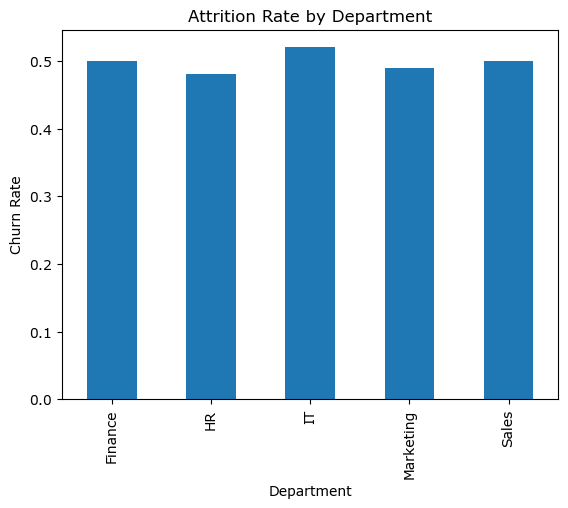

In [121]:
churn_rate = df.groupby('Department')['Left_Company_Flag'].mean().round(2)
churn_rate.plot(kind='bar', title='Attrition Rate by Department')
plt.ylabel('Churn Rate')
plt.show()

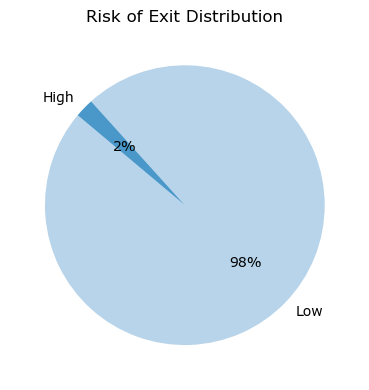

In [122]:
risk_counts = df['Risk_of_Exit'].value_counts()

pie_colors = plt.cm.Blues(np.linspace(0.3, 0.6, len(risk_counts)))

# Plot
plt.figure(figsize=(4, 4))
plt.pie(
    risk_counts,
    labels=risk_counts.index,
    autopct='%1.0f%%',
    startangle=140,
    colors=pie_colors
)

plt.title('Risk of Exit Distribution')
plt.tight_layout()
plt.show()

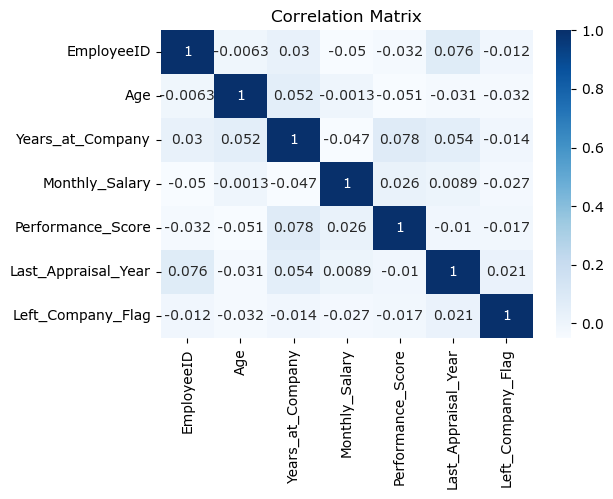

In [123]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()